<a href="https://colab.research.google.com/github/seneca-m/DataProcessing-PythonDevelopment-Pandas/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**


For this project, I've chosen a classic real-world problem: Predicting Heart Disease. This is a binary classification task (presence or absence of heart disease) and uses the Heart Disease dataset from the UCI Machine Learning Repository. This dataset is excellent because it has a mix of numerical and categorical features, requires cleaning, and the problem has clear real-world significance.

**Initial Setup**

In [1]:
# --- Initial Setup ---
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for preprocessing, models, and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

# Set random seed for reproducibility
np.random.seed(42)

print("Mounting Google Drive (if applicable for other files)...")
drive.mount('/content/drive')
print("Google Drive mounted.")
print("\nAll necessary libraries imported and setup complete.")

Mounting Google Drive (if applicable for other files)...
Mounted at /content/drive
Google Drive mounted.

All necessary libraries imported and setup complete.


# **Task 1: Problem Definition and Dataset Selection**
**Problem Definition:**


The objective is to predict the presence of heart disease in patients based on various clinical and demographic attributes. This is a crucial real-world classification problem, as early and accurate prediction can enable timely medical intervention, improve patient outcomes, and reduce healthcare costs. Misclassifications (false positives or false negatives) have significant consequences, making it a challenging and important application for machine learning.

**Dataset Selection:**

I have selected the Heart Disease Dataset from the UCI Machine Learning Repository (specifically the Cleveland dataset subset).

**Source URL:** https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

**Justification:**
*   Real-world challenge: Heart disease is a leading cause of mortality globally, making accurate prediction vital.
*   Classification task: It involves predicting a binary outcome (presence/absence of disease).
*   Data characteristics: Contains a mix of numerical and categorical features, common in medical records, and requires cleaning (e.g., handling '?' values).
*   Publicly available: Ensures reproducibility

# **Task 2: Data Preprocessing and Exploration**


This section loads the Heart Disease dataset, handles missing values, encodes categorical features, scales numerical features, and performs initial exploratory data analysis (EDA).

In [2]:
# Define column names as per UCI dataset documentation
# (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target)
# The 'num' attribute (diagnosis of heart disease) is the target variable.
# Values: 0 (no presence), 1, 2, 3, 4 (presence). We'll convert 1,2,3,4 to 1 (disease present).
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

print("Loading Heart Disease dataset...")
df = pd.read_csv(data_url, names=column_names, na_values='?')
print("Dataset loaded successfully!")

Loading Heart Disease dataset...
Dataset loaded successfully!


In [3]:
print("\n--- Initial Data Exploration ---")
print("\nDataFrame Info:")
df.info() # Check data types and non-null counts


--- Initial Data Exploration ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [4]:
print("\nDescriptive Statistics:")
print(df.describe()) # Summary statistics for numerical columns


Descriptive Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
st

In [5]:
print("\nHead of DataFrame:")
print(df.head()) # First 5 rows


Head of DataFrame:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [6]:
print("\nValue counts for target variable ('target'):")
print(df['target'].value_counts()) # Original target values
# Convert target to binary: 0 (no disease), 1 (disease present)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
print("\nValue counts for binary target ('target' - 0: No disease, 1: Disease):")
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True)) # Percentage


Value counts for target variable ('target'):
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Value counts for binary target ('target' - 0: No disease, 1: Disease):
target
0    164
1    139
Name: count, dtype: int64
target
0    0.541254
1    0.458746
Name: proportion, dtype: float64


In [7]:
# --- Handling Missing Values ---
print("\n--- Handling Missing Values ---")
print("Missing values before handling:")
print(df.isnull().sum())


--- Handling Missing Values ---
Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [8]:
# 'ca' (number of major vessels) and 'thal' (thalassemia) have missing values represented as '?'
# Dropping rows with missing values for simplicity in this project.
# For a real-world scenario, imputation might be considered.
df.dropna(inplace=True)
print("\nMissing values after handling (dropped rows):")
print(df.isnull().sum())
print(f"DataFrame shape after dropping missing values: {df.shape}")


Missing values after handling (dropped rows):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
DataFrame shape after dropping missing values: (297, 14)


In [9]:
# --- Identifying Numerical and Categorical Features ---
# Based on UCI documentation and common interpretation for this dataset:
# Numerical: 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'
# Categorical (to be encoded): 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [10]:
# Ensure all identified features are in the dataframe
missing_num_features = [f for f in numerical_features if f not in df.columns]
missing_cat_features = [f for f in categorical_features if f not in df.columns]
if missing_num_features or missing_cat_features:
    print(f"WARNING: Missing features identified. Numerical: {missing_num_features}, Categorical: {missing_cat_features}")

In [11]:
# --- Data Visualization for EDA ---
print("\n--- Data Visualizations ---")


--- Data Visualizations ---


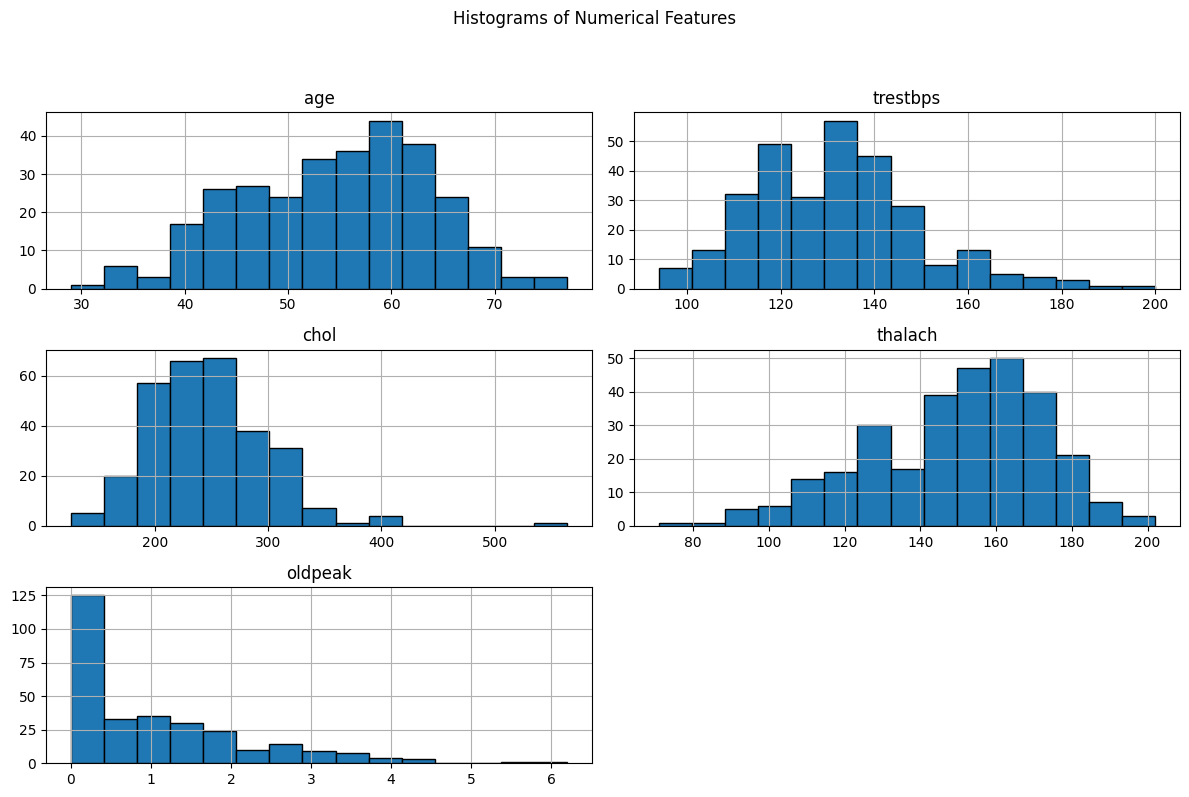

In [12]:
# Histograms for numerical features
df[numerical_features].hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

/tmp/ipython-input-13-4266130753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-13-4266130753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-13-4266130753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-13-4266130753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

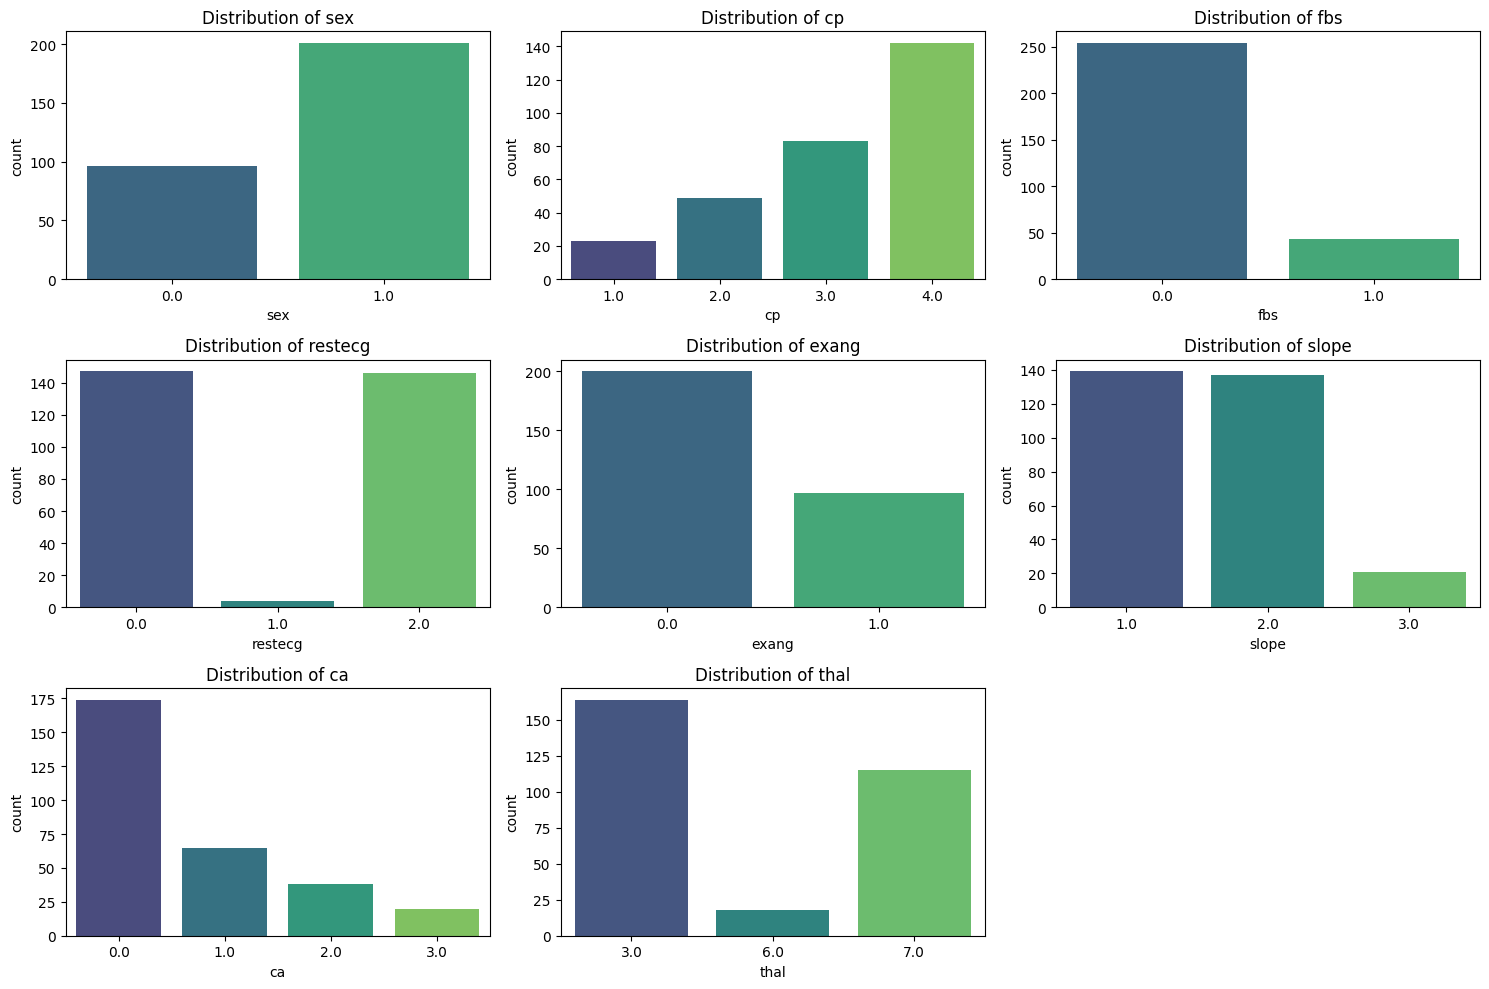

In [13]:
# Count plots for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

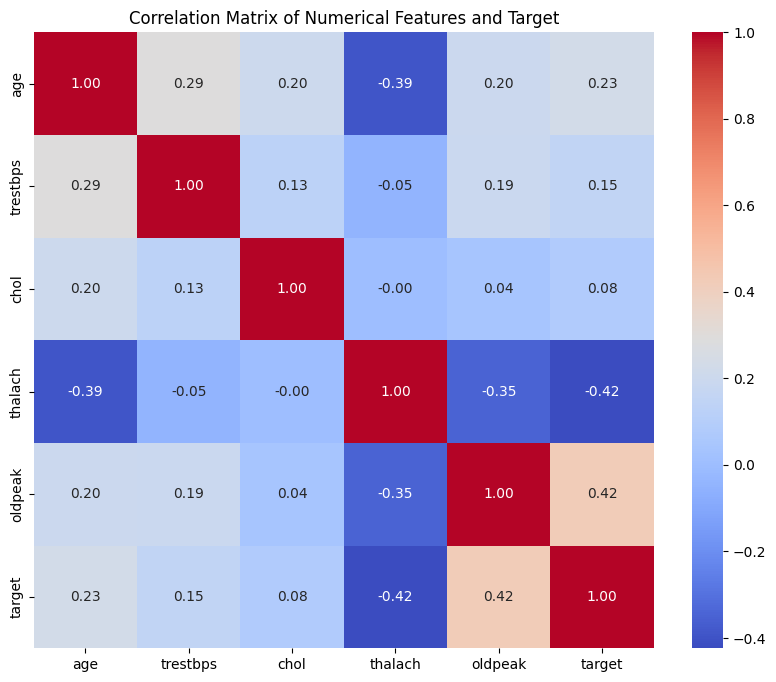

In [14]:
# Correlation Heatmap for numerical features (after target binarization)
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['target']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Target')
plt.show()

In [15]:
# --- Splitting Data ---
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split: X_train shape {X_train.shape}, X_test shape {X_test.shape}")
print(f"y_train value counts:\n{y_train.value_counts(normalize=True)}")
print(f"y_test value counts:\n{y_test.value_counts(normalize=True)}")
print("\nTask 2: Data Preprocessing and Exploration completed.")


Data split: X_train shape (237, 13), X_test shape (60, 13)
y_train value counts:
target
0    0.540084
1    0.459916
Name: proportion, dtype: float64
y_test value counts:
target
0    0.533333
1    0.466667
Name: proportion, dtype: float64

Task 2: Data Preprocessing and Exploration completed.


# **Task 3: Model Selection and Development**


Here, we'll set up a processing pipeline, select a Random Forest Classifier, and perform hyperparameter tuning using GridSearchCV.

In [16]:
# --- Task 3: Model Selection and Development ---

print("\n--- Setting up Preprocessing Pipeline ---")

# Create preprocessor for numerical and categorical features
# StandardScaler for numerical features
# OneHotEncoder for categorical features (handle_unknown='ignore' to avoid errors during prediction of unseen categories)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


--- Setting up Preprocessing Pipeline ---


In [17]:
# Create a machine learning pipeline
# It first preprocesses the data, then applies the RandomForestClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])
print("Data preprocessing and classifier pipeline created.")

Data preprocessing and classifier pipeline created.


In [18]:
print("\n--- Hyperparameter Tuning with GridSearchCV ---")
# Define parameter grid for GridSearchCV
# n_estimators: number of trees in the forest
# max_features: number of features to consider when looking for the best split
# max_depth: maximum depth of the tree
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_features': ['sqrt', 'log2'], # Using 'sqrt' for max_features is common
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}


--- Hyperparameter Tuning with GridSearchCV ---


In [19]:
# Set up GridSearchCV
# cv=5 for 5-fold cross-validation
# scoring='roc_auc' as AUC is a good metric for imbalanced classification problems
# n_jobs=-1 to use all available CPU cores
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

print("Starting Grid Search... This might take a few minutes.")
grid_search.fit(X_train, y_train) # Fit GridSearch on training data

print("\nGrid Search completed.")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation AUC score: {grid_search.best_score_:.4f}")


Starting Grid Search... This might take a few minutes.
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Grid Search completed.
Best parameters found: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validation AUC score: 0.9088


In [20]:
# Get the best model
best_model = grid_search.best_estimator_
print("\nBest model obtained from Grid Search.")

print("\nTask 3: Model Selection and Development completed.")


Best model obtained from Grid Search.

Task 3: Model Selection and Development completed.


# **Task 4: Model Evaluation and Optimization**
This task evaluates the optimized model's performance on the test set using various metrics.

In [21]:
# --- Task 4: Model Evaluation and Optimization ---

# Ensure best_model, X_test, y_test are defined from Task 3
if 'best_model' not in locals():
    print("Best model not found. Please run Task 3 first.")
else:
    print("\n--- Model Evaluation on Test Set ---")
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1] # Probability of positive class


--- Model Evaluation on Test Set ---


In [23]:
 # --- Performance Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8333
Precision: 0.8462
Recall: 0.7857
F1-Score: 0.8148
ROC AUC Score: 0.9442



Confusion Matrix:
[[28  4]
 [ 6 22]]


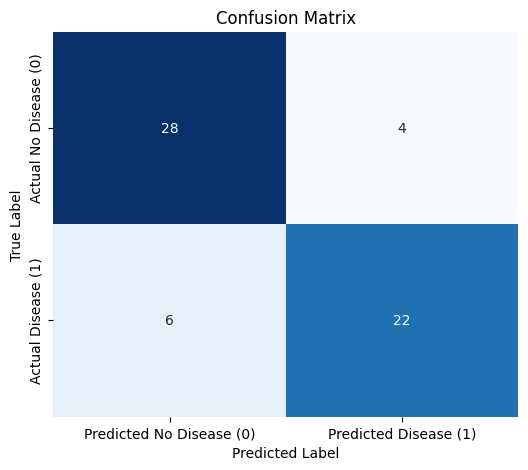

In [24]:
 # Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted No Disease (0)', 'Predicted Disease (1)'],
                yticklabels=['Actual No Disease (0)', 'Actual Disease (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



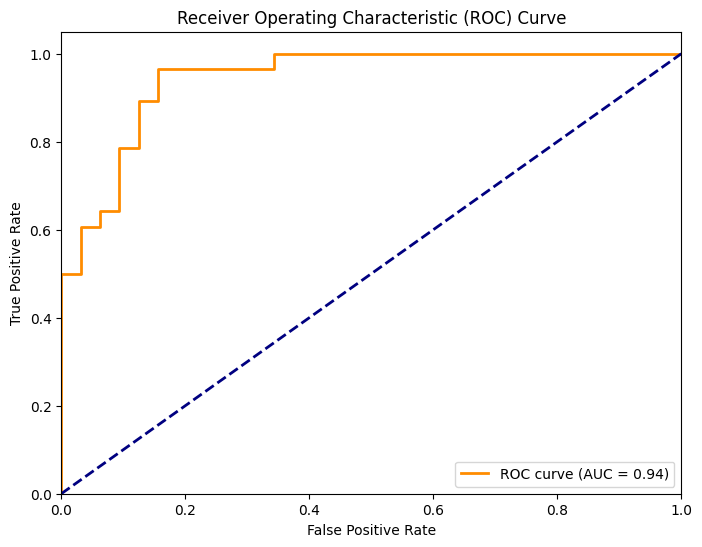

REMINDER: Take a screenshot of the ROC Curve for your report (Task 4).

Task 4: Model Evaluation and Optimization completed.


In [27]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("REMINDER: Take a screenshot of the ROC Curve for your report (Task 4).")

# Optimization Note: Hyperparameter tuning (GridSearchCV) was performed in Task 3.
# The 'best_model' is already the optimized version.

print("\nTask 4: Model Evaluation and Optimization completed.")

# Task 5: Model Deployment and Presentation

This section demonstrates how to use the trained model interactively within the Colab notebook.

In [ ]:
# --- Task 5: Model Deployment and Presentation ---

if 'best_model' not in locals():
    print("Best model not found. Please run Task 3 first.")
else:
    print("\n--- Model Deployment and Interactive Prediction ---")

    # Define a function to take user input, preprocess, and predict
    def predict_heart_disease(model, input_data):
        # Create a DataFrame from input_data to match training feature order
        input_df = pd.DataFrame([input_data], columns=X.columns)

        # The model (pipeline) already includes preprocessing (scaling and one-hot encoding)
        prediction = model.predict(input_df)[0]
        prediction_proba = model.predict_proba(input_df)[0, 1] # Probability of disease

        result = "Presence of Heart Disease" if prediction == 1 else "No Heart Disease"
        print(f"\nPrediction: {result}")
        print(f"Probability of Disease: {prediction_proba:.4f}")
        return prediction, prediction_proba

    print("\n--- User-friendly Interface for Prediction ---")
    print("Please enter patient details for heart disease prediction.")
    print("Input 'q' to quit.")

    while True:
        try:
            # Gather user input for each feature
            age = float(input("Age: "))
            sex = float(input("Sex (0=female, 1=male): "))
            cp = float(input("Chest Pain Type (1-4): "))
            trestbps = float(input("Resting Blood Pressure (mm Hg): "))
            chol = float(input("Serum Cholestoral (mg/dl): "))
            fbs = float(input("Fasting Blood Sugar > 120 mg/dl (0=false, 1=true): "))
            restecg = float(input("Resting Electrocardiographic Results (0-2): "))
            thalach = float(input("Maximum Heart Rate Achieved: "))
            exang = float(input("Exercise Induced Angina (0=no, 1=yes): "))
            oldpeak = float(input("ST depression induced by exercise relative to rest: "))
            slope = float(input("Slope of the peak exercise ST segment (1-3): "))
            ca = float(input("Number of major vessels (0-3) colored by flourosopy: "))
            thal = float(input("Thal (3=normal, 6=fixed defect, 7=reversable defect): "))

            user_input_data = {
                'age': age, 'sex': sex, 'cp': cp, 'trestbps': trestbps, 'chol': chol,
                'fbs': fbs, 'restecg': restecg, 'thalach': thalach, 'exang': exang,
                'oldpeak': oldpeak, 'slope': slope, 'ca': ca, 'thal': thal
            }

            predict_heart_disease(best_model, user_input_data)

        except ValueError:
            print("Invalid input. Please enter numerical values or 'q' to quit.")
            continue # Continue to the next iteration of the loop

        except EOFError: # Handles when execution is stopped (e.g., Ctrl+D in some environments)
            print("Exiting prediction interface.")
            break

        # Check for 'q' to quit
        if input("\nEnter 'q' to quit or any other key to predict again: ").lower() == 'q':
            break

    print("\nTask 5: Model Deployment and Presentation completed.")


--- Model Deployment and Interactive Prediction ---

--- User-friendly Interface for Prediction ---
Please enter patient details for heart disease prediction.
Input 'q' to quit.
Age: 89
Sex (0=female, 1=male): 0
Chest Pain Type (1-4): 3
Resting Blood Pressure (mm Hg): 145
Serum Cholestoral (mg/dl): 54
Fasting Blood Sugar > 120 mg/dl (0=false, 1=true): 1
Resting Electrocardiographic Results (0-2): 1
Maximum Heart Rate Achieved: 100
Exercise Induced Angina (0=no, 1=yes): 0
ST depression induced by exercise relative to rest: 1
Slope of the peak exercise ST segment (1-3): 2
Number of major vessels (0-3) colored by flourosopy: 3
Thal (3=normal, 6=fixed defect, 7=reversable defect): 6

Prediction: Presence of Heart Disease
Probability of Disease: 0.5166
